EDA:

Lets's start by loading in dataset and taking a look at it.

In [2]:
# all necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import eda_utils as eda

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

housing.head()


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [3]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

Right off the bat, the following columns stand out as potential feature candidates in determining the sale price:

1. 'OverallQual' Overall quality of the house
2. 'OverallCond' Overall condition of the house
3. 'GrLivArea' Gross Living Area

Before we visualize the relationship between the Sale Price and its features, lets look at the 'SalePrice' itself. 

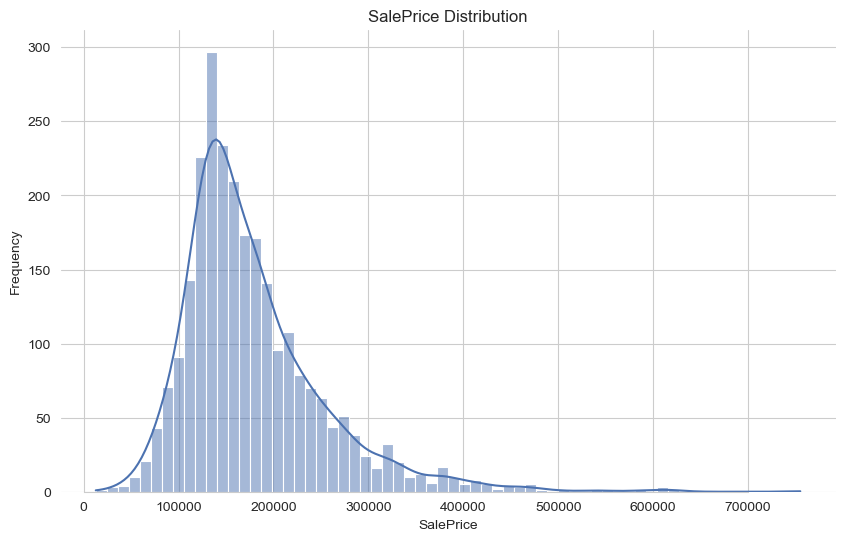

In [4]:
sns.set_style("whitegrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(housing['SalePrice'], kde=True, color="b")
ax.set(title="SalePrice Distribution",
       xlabel="SalePrice",
       ylabel="Frequency")
sns.despine(trim=True, left=True)
plt.show()

As we can see, the distribution is skewed to the right.

Let's look at the relationship between the Overall Quality of the home and its Sale Price

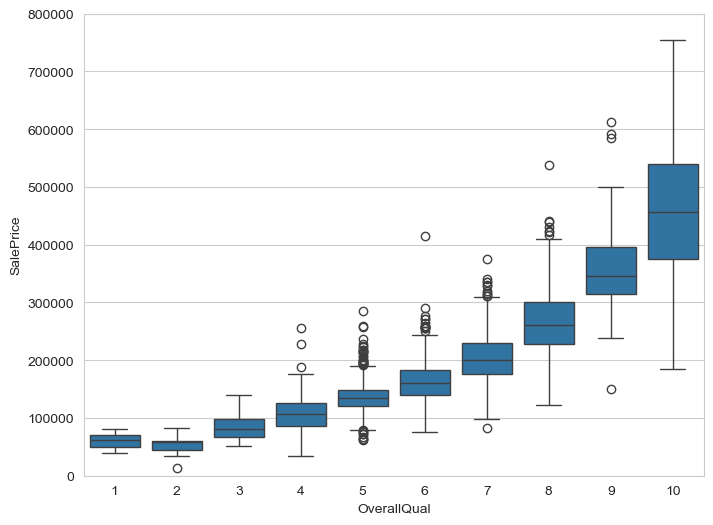

In [5]:
#Creating a box plot with OverallQual and Sale Price
data = pd.concat([housing['SalePrice'], housing['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=housing['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

It seems like Over Quality is directly related to Sale Price with a positive correlation, now lets do the same over Overall Condition

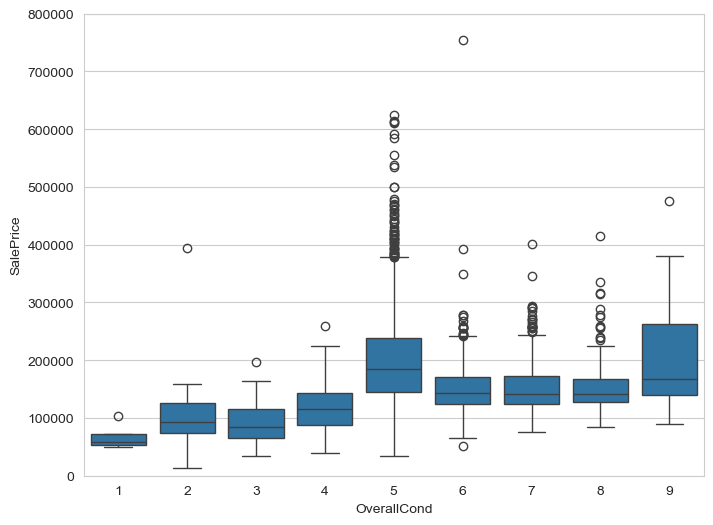

In [6]:
#Creating a box plot with OverallCond and Sale Price
data = pd.concat([housing['SalePrice'], housing['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=housing['OverallCond'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Hmmmm, not as correlated as Overall Quality. Let's

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

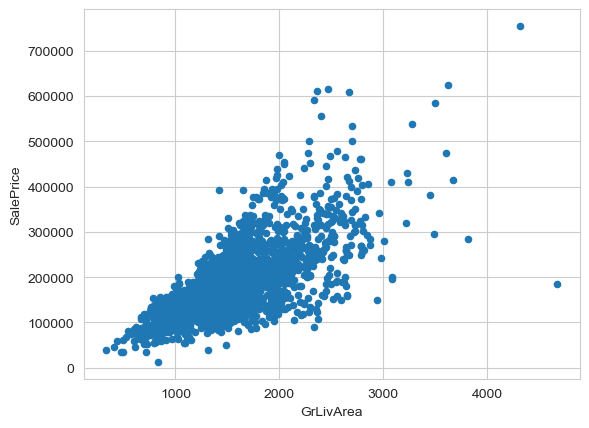

In [7]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

Seems like a pretty linear relationship with the Gross Living Area and Sale Price.

Let's make a correlation matrix heatmap with the rest of the features.

To make sure the heatmap is fed only numeric values, lets filter the dataset for numerics only before creating heatmap. 



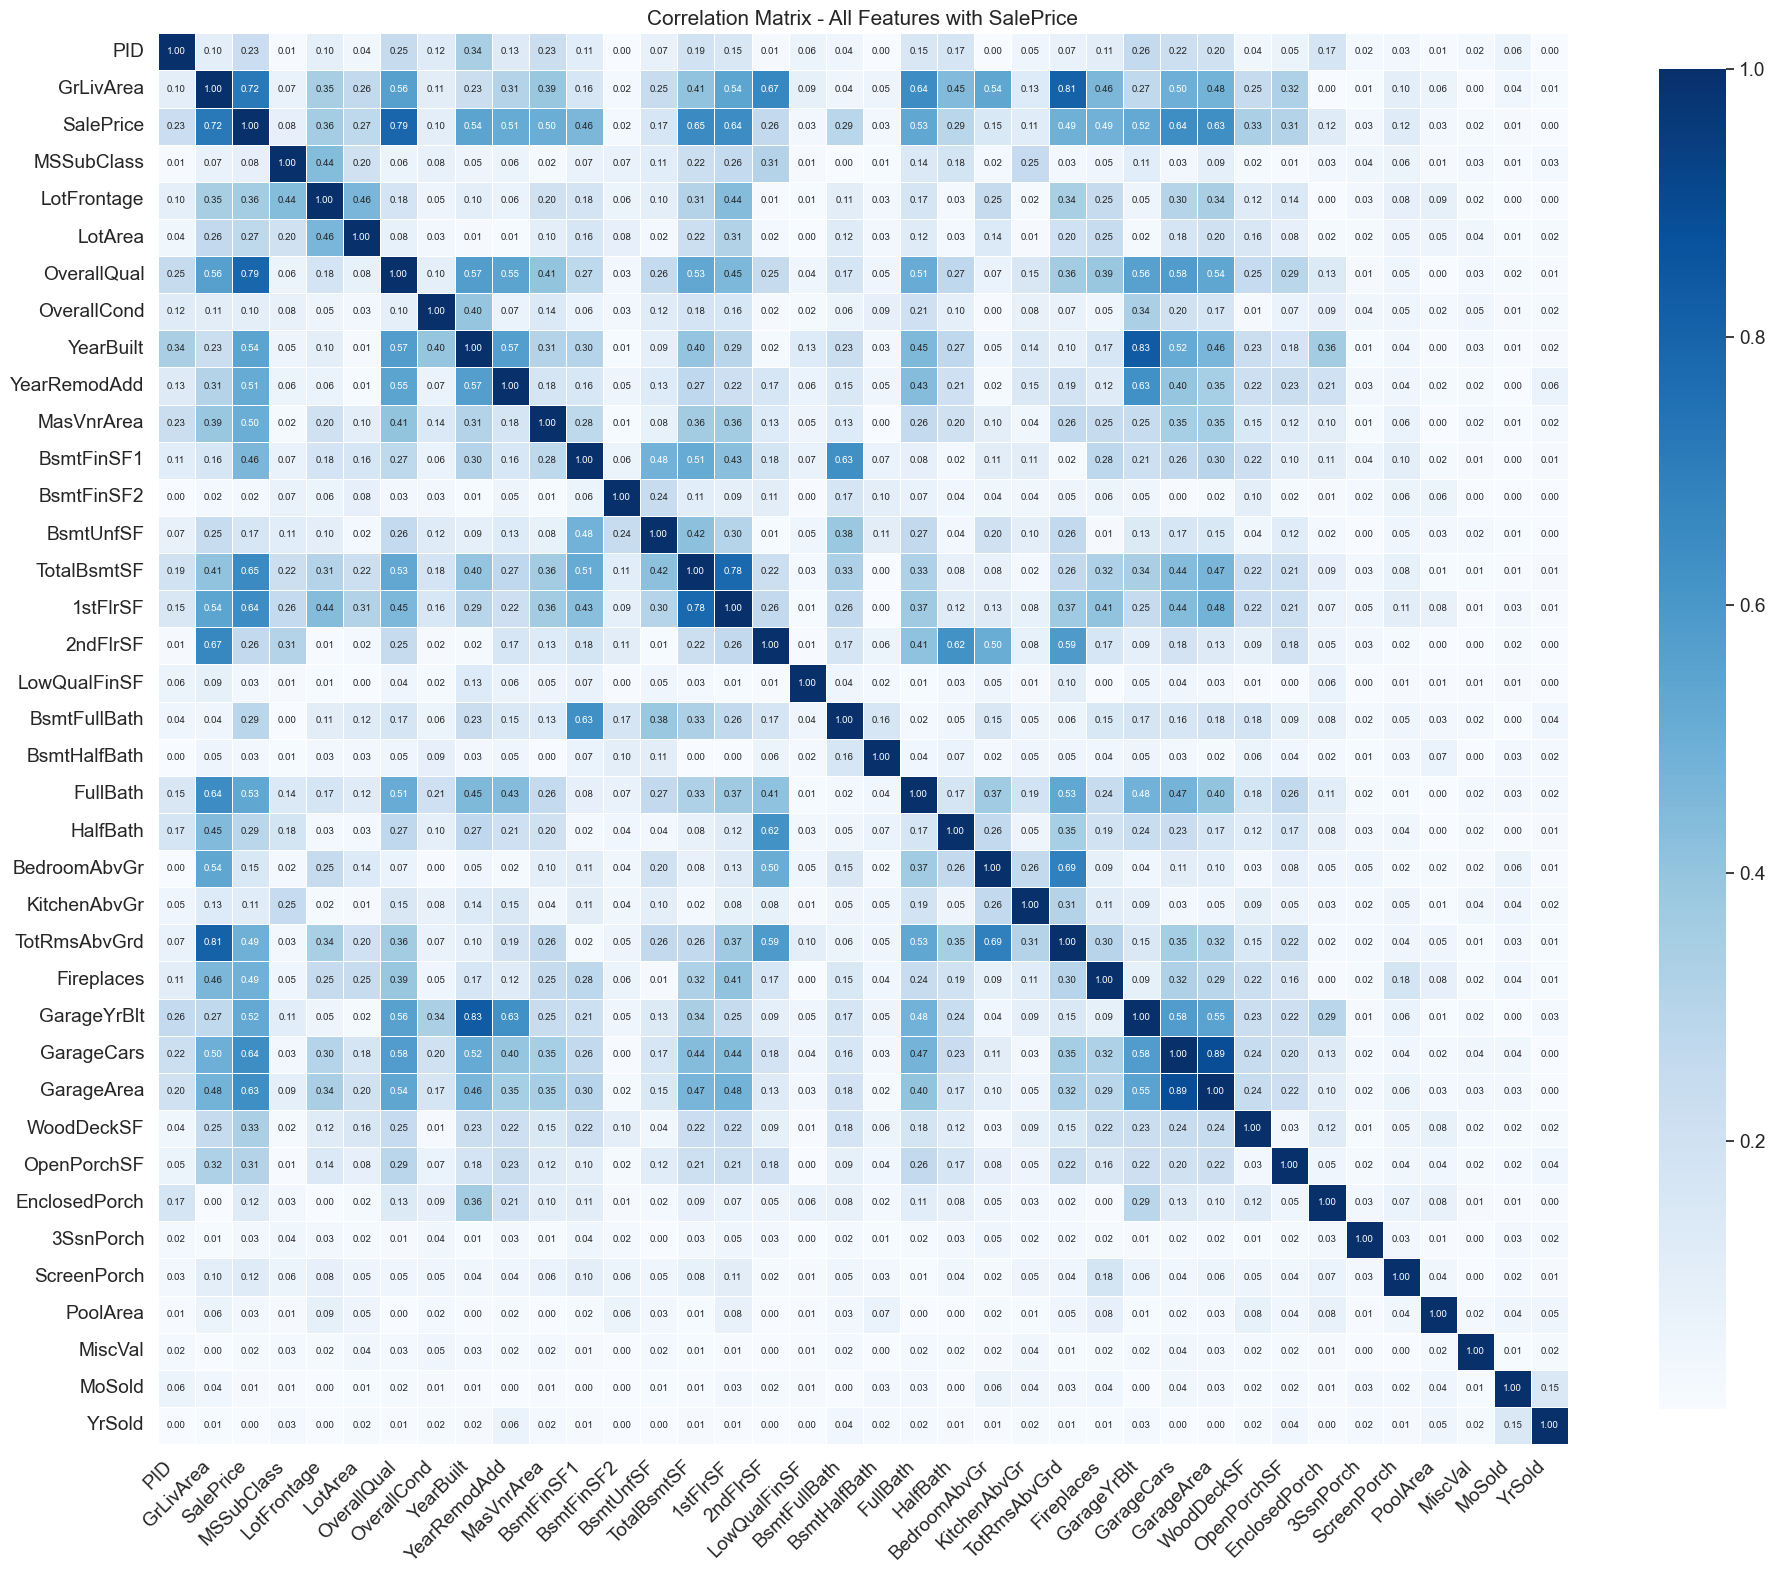

In [8]:
# Get the column names of all numeric data
numeric_columns = housing.select_dtypes(include = 'number').columns

# Plot a correlation matrix heatmap of numeric data
eda.plot_corr_matrix(housing[numeric_columns], 'SalePrice')

It seems like only a small subset of columns are having a large impact on our 'SalePrice' Let's narrow it down a bit for a clearer picture.

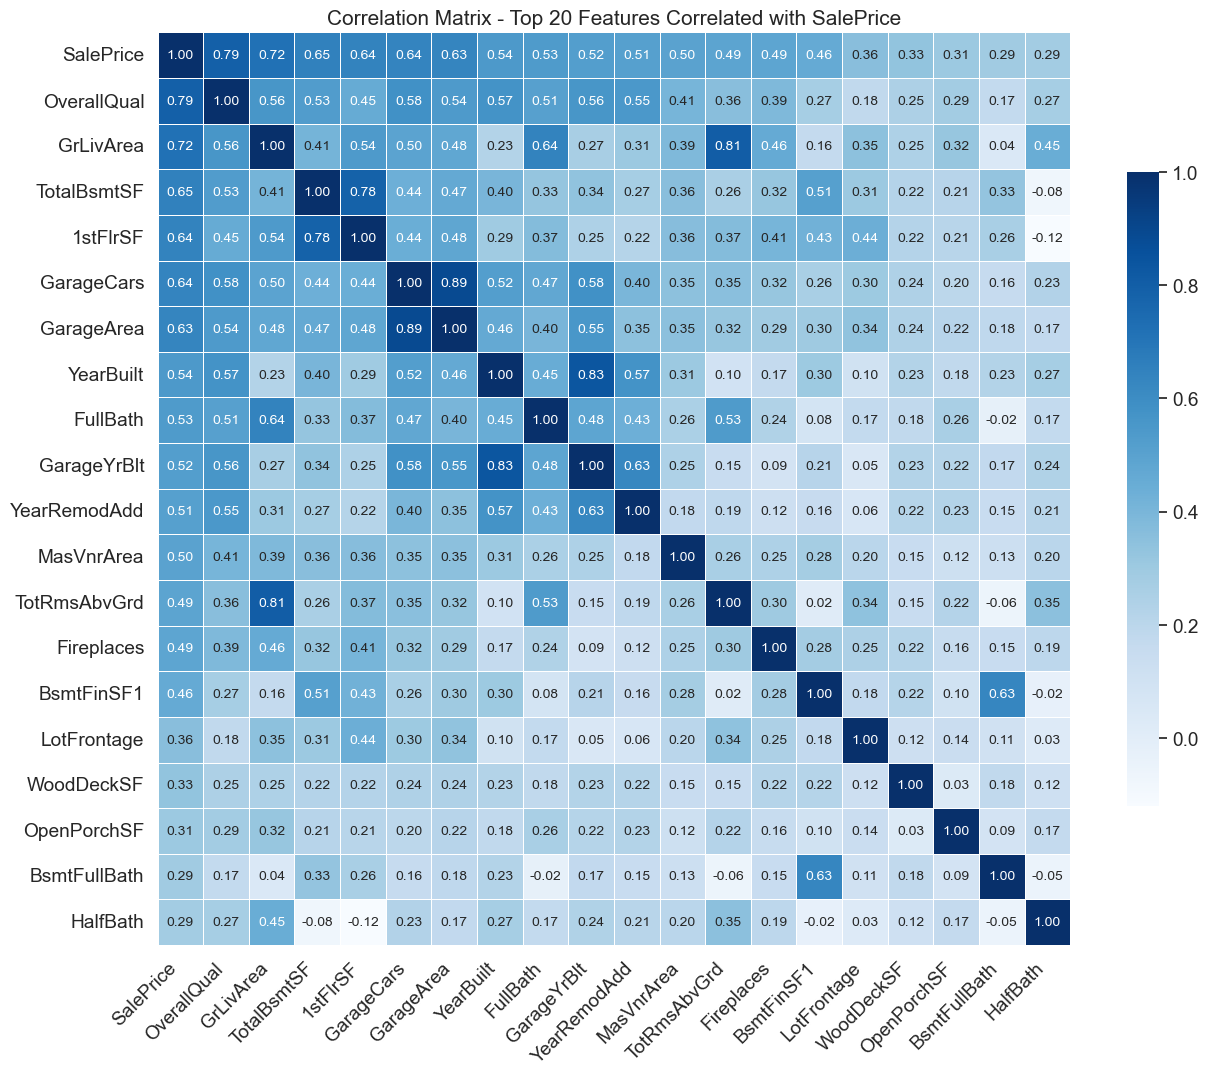

In [9]:
# Lets look at the top 20 features
eda.plot_corr_matrix(housing[numeric_columns], 'SalePrice', 20)

In [10]:
# Display number of missing values (NaN) for each column
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
MasVnrType,1573,0.609690
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageQual,129,0.050000
GarageFinish,129,0.050000
GarageYrBlt,129,0.050000


Seems to be a lot of missing values in the dataset. Let's look further down the list to find them all.

In [11]:
missing_data.head(30)


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
MasVnrType,1573,0.609690
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageQual,129,0.050000
GarageFinish,129,0.050000
GarageYrBlt,129,0.050000


There are 27 columns columns with missing data values. I included percentage of missing values to see which columns are worth keeping or deleting. Let's split them up by Categorical and Numeric data.

In [25]:
# Get numeric columns from housing data
numeric_cols = housing.select_dtypes(include='number').columns

# Calculate missing values for numeric columns only
numeric_total = housing[numeric_cols].isnull().sum().sort_values(ascending=False)
numeric_percent = (housing[numeric_cols].isnull().sum() / housing[numeric_cols].isnull().count()).sort_values(ascending=False)

# Combine into a DataFrame
numeric_missing_data = pd.concat([numeric_total, numeric_percent], axis=1, keys=['Total', 'Percent'])

# Display results
print("Missing Values in Numeric Columns:")
numeric_missing_data.head(1)

Missing Values in Numeric Columns:


,Total,Percent
LotFrontage,462,0.179070
GarageYrBlt,129,0.050000
MasVnrArea,14,0.005426
BsmtHalfBath,2,0.000775
BsmtFullBath,2,0.000775
GarageCars,1,0.000388
GarageArea,1,0.000388
TotalBsmtSF,1,0.000388
BsmtUnfSF,1,0.000388
BsmtFinSF2,1,0.000388
